<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/GM12878_diff_nuc_f4ac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating the performance of SeATAC on calling differential nucleosomes on downsampled GM12878 data


In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # required by R package ComplexHeatmap 

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
system('apt-get install libmagick++-dev', intern = TRUE) # required by magick

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  [5] "  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
  [6] "  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  [7] "  libcupsfilters1 libcupsimage2 libdjvulibre-dev libdjvulibre-text"                                              

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 
  'dplyr', 'AUC',
  'BSgenome.Hsapiens.UCSC.hg19',
  'EnrichedHeatmap', 'magick', 'patchwork'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'AUC', 'BSgenome.Hsapiens.UCSC.hg19',
  'EnrichedHeatmap', 'magick', 'patchwork'

also installing the dependencies ‘formatR’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘lambda.r’, ‘futile.options’, ‘SummarizedExperiment’, ‘futile.logger’, ‘snow’, ‘BH’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XML’, ‘zlibbioc’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘bitops’, ‘BiocParallel’, ‘Rhtslib’, ‘iterators’, ‘BiocGenerics’, ‘S4Vectors’, ‘GenomeInfoDb’, ‘Biostrings’, ‘rtracklayer’, ‘XVector’, ‘Rsamtools’, ‘clue’, ‘GlobalOptions’, ‘png’, ‘foreach’, ‘doParallel’, ‘rjson’, ‘shape’, ‘BSgenome’, ‘ComplexHeatmap’, ‘GenomicRanges’, ‘matrixStats’, ‘GetoptLong’, ‘locfit’, ‘circlize’, ‘IRanges’


Old packages: 'crayon', 'fansi', 'gert', 'knitr', 

In [ ]:
library(devtools)

Loading required package: usethis



### Install SeATAC from github

In [ ]:
install_github('gongx030/seatac@v0.4.0', force = TRUE, quiet = FALSE)
reload(pkgload::inst("seatac"))
library(seatac)

crayon       (1.5.0 -> 1.5.1 ) [CRAN]
vctrs        (0.3.8 -> 0.4.0 ) [CRAN]
fansi        (1.0.2 -> 1.0.3 ) [CRAN]
magrittr     (2.0.2 -> 2.0.3 ) [CRAN]
tfautograph  (NA    -> 0.3.2 ) [CRAN]
processx     (3.5.2 -> 3.5.3 ) [CRAN]
config       (NA    -> 0.3.1 ) [CRAN]
here         (NA    -> 1.0.1 ) [CRAN]
RcppTOML     (NA    -> 0.1.7 ) [CRAN]
zeallot      (NA    -> 0.1.0 ) [CRAN]
tfruns       (NA    -> 1.5.0 ) [CRAN]
tensorflow   (NA    -> 2.8.0 ) [CRAN]
reticulate   (NA    -> 1.24  ) [CRAN]
caTools      (NA    -> 1.18.2) [CRAN]
gtools       (NA    -> 3.9.2 ) [CRAN]
keras        (NA    -> 2.8.0 ) [CRAN]
abind        (NA    -> 1.4-5 ) [CRAN]
gplots       (NA    -> 3.1.1 ) [CRAN]
tfdatasets   (NA    -> 2.7.0 ) [CRAN]
tfprobabi... (NA    -> 0.15.0) [CRAN]


Installing 20 packages: crayon, vctrs, fansi, magrittr, tfautograph, processx, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, caTools, gtools, keras, abind, gplots, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp6s9RTR/remotes5644af8850/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Load R packages

In [ ]:
library(GenomicRanges)
library(BSgenome.Hsapiens.UCSC.hg19)
library(dplyr)
library(ggplot2)
library(EnrichedHeatmap)
library(circlize)
library(magick)
library(AUC)
library(broom)
library(patchwork)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

### TensorFlow setup

In [ ]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [ ]:
Sys.time() - start_time

Time difference of 13.64566 mins

## Parameters

In [ ]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 10L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 5L,

  vae_num_peaks = 10000L,
  vae_latent = c(10L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,

  target_width = 100L,
  min_test_reads = 1L,
  max_test_reads = 10L,
  center_width = 100L # the center width
)

## Load full GM12878 ATAC-seq data

In [ ]:
remote_bam_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells.bam'
local_bam_file <- gsub('https://', './', remote_bam_file)
system(sprintf('wget -cx %s', remote_bam_file))
remote_bed_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_summits.bed'
local_bed_file <- gsub('https://', './', remote_bed_file)
system(sprintf('wget -cx %s', remote_bed_file))

## Load the benchmark data on GM12878

In [ ]:
remote_benchmark_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_benchmark_block=640_step_size=10.rds'
local_benchmark_file <- gsub('https://', './', remote_benchmark_file)
sprintf('wget -cx %s', remote_benchmark_file) %>% system()

In [ ]:
gr0 <- readRDS(local_benchmark_file)

In [ ]:
is_nucleosome <- which(gr0$is_peak_at_center & gr0$nucleoatac_score > 0.5)
set.seed(1)
is_not_nucleosome <- sample(which(!gr0$is_peak_at_center & gr0$nucleoatac_score < 0.01), length(is_nucleosome))

In [ ]:
sprintf('# of nucleosomes (NOR): %d', length(is_nucleosome)) %>% message()
sprintf('# of NFR: %d', length(is_not_nucleosome)) %>% message()

# of nucleosomes (NOR): 5601

# of NFR: 5601



## Download the downsampled BAM files

In [ ]:
seeds <- 1:5
pcts <- c(0.1)
param <- expand.grid(seed = seeds, pct = pcts)
param <- param %>%
  mutate(remote_bam_file = sprintf('https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=%d_pct=%.4f.bam', seed, pct)) %>%
  mutate(local_bam_file = gsub('https://', './', remote_bam_file)) %>%
  mutate(remote_nucleoatac_file = gsub('.bam', '.nucleoatac_signal.smooth.bw', remote_bam_file)) %>% 
  mutate(local_nucleoatac_file = gsub('https://', './', remote_nucleoatac_file))

In [ ]:
for (i in 1:nrow(param)){
  system(sprintf('wget -x -c %s', param[i, 'remote_bam_file']))
}

In [ ]:
sprintf('# local BAM files: %d/%d', sum(file.exists(param$local_bam_file)), nrow(param)) %>% message()

# local BAM files: 5/5



## Read V-plots for training

In [ ]:
gr_all <- read.table(local_bed_file, header = FALSE, sep = '\t')
gr_all <- GRanges(seqnames = gr_all[, 1], range = IRanges(gr_all[, 2], gr_all[, 3]))
gr_all <- gr_all[!seqnames(gr_all) %in% c('chrM', 'chrY')]
gr_all <- gr_all %>% resize(width = ARGS[['window_size']], fix = 'center')

In [ ]:
gr <- slidingWindows(gr_all, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L)
gr_S1 <- sample(gr, ARGS[['vae_num_peaks']]) %>% resize(width = ARGS[['block_size']], fix = 'center')
gr_S2 <- sample(gr, ARGS[['vae_num_peaks']]) %>% resize(width = ARGS[['block_size']], fix = 'center')

Generate two sets of genomic ranges as two seperate *pseudo* samples

In [ ]:
counts1 <- count_reads(gr_S1, param$local_bam_file[1], genome = BSgenome.Hsapiens.UCSC.hg19,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))
counts2 <- count_reads(gr_S2, param$local_bam_file[1], genome = BSgenome.Hsapiens.UCSC.hg19,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=1_pct=0.1000.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=1_pct=0.1000.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=1_pct=0.1000.bam



In [ ]:
counts <- cbind(counts1, counts2)
valid <- rowSums(counts >= ARGS[['min_reads']]) == 2L
gr_S1 <- gr_S1[valid]
gr_S2 <- gr_S2[valid]
sprintf('number of training peaks for VaeModel: %d', sum(valid)) %>% message()

number of training peaks for VaeModel: 5604



In [ ]:
x1 <- read_vplot(gr_S1, filenames = local_bam_file, genome = BSgenome.Hsapiens.UCSC.hg19, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])
x2 <- read_vplot(gr_S2, filenames = local_bam_file, genome = BSgenome.Hsapiens.UCSC.hg19, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells.bam



In [ ]:
x2@rowRanges <- x1@rowRanges
x1@dimdata$sample$name <- 'S1'
x2@dimdata$sample$name <- 'S2'
x <- cbind(x1, x2)

## Training VAE model for V-plots

As of 3/14/2022, Colab had errors on the first run. Run the cell again will resolve the issue.

In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
model <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 6687.7917148 | loss_reconstruction= 6686.6644287 | loss_kl=    1.1272763

epoch=     2/   200 | beta=1.000e+00 | loss= 5379.0918746 | loss_reconstruction= 5373.6252663 | loss_kl=    5.4665883

epoch=     3/   200 | beta=1.000e+00 | loss= 4644.9866278 | loss_reconstruction= 4640.9832209 | loss_kl=    4.0034341

epoch=     4/   200 | beta=1.000e+00 | loss= 3619.8993197 | loss_reconstruction= 3617.7174516 | loss_kl=    2.1818693

epoch=     5/   200 | beta=1.000e+00 | loss= 2384.3911050 | loss_reconstruction= 2383.1936978 | loss_kl=    1.1973908

epoch=     6/   200 | beta=1.000e+00 | loss= 1409.0141768 | loss_reconstruction= 1408.3601407 | loss_kl=    0.6540307

epoch=     7/   200 | beta=1.000e+00 | loss=  912.9614938 | loss_reconstruction=  912.4828089 | loss_kl=    0.4786812

epoch=     8/   200 | beta=1.000e+00 | loss=  712.2480885 | loss_reconstruction=  711.4401966 | loss_kl=    0.8078958

epoch=     9/   200 | beta=1.000e+00 | loss=  62

## Download the downsampled NucleoATAC files

In [ ]:
for (i in 1:nrow(param)){
  system(sprintf('wget -cx %s', param[i, 'remote_nucleoatac_file']))
}

In [ ]:
sprintf('# local NucleoATAC files: %d/%d', sum(file.exists(param$local_nucleoatac_file)), nrow(param)) %>% message()

# local NucleoATAC files: 5/5



## Read the V-plot from down-sampled ATAC-seq

In [ ]:
x_test <- list()

In [ ]:
gr_S1 <- gr0[is_not_nucleosome]
gr_S2 <- gr0[is_nucleosome]
label <- cbind(rep(FALSE, length(gr_S1)), rep(TRUE, length(gr_S2)))
gr_S1 <- resize(gr_S1, width = ARGS[['block_size']], fix = 'center')
gr_S2 <- resize(gr_S2, width = ARGS[['block_size']], fix = 'center')

In [ ]:
for (i in 1:nrow(param)){
  xi_S1 <- gr_S1 %>%
    read_vplot(
      param[i, 'local_bam_file'],
      genome = BSgenome.Hsapiens.UCSC.hg19,
      bin_size = ARGS[['bin_size']],
      fragment_size_range = c(0, ARGS[['fragment_size_range_max']]),
      fragment_size_interval = ARGS[['fragment_size_interval']]
    )
  xi_S2 <- gr_S2 %>%
    read_vplot(
      param[i, 'local_bam_file'],
      genome = BSgenome.Hsapiens.UCSC.hg19,
      bin_size = ARGS[['bin_size']],
      fragment_size_range = c(0, ARGS[['fragment_size_range_max']]),
      fragment_size_interval = ARGS[['fragment_size_interval']]
    )
  xi_S1@rowRanges <- xi_S2@rowRanges
  xi_S1@dimdata$sample$name <- 'S1'
  xi_S2@dimdata$sample$name <- 'S2'
  xi <- cbind(xi_S1, xi_S2)
  x_test[[i]] <- xi
}

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=1_pct=0.1000.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=1_pct=0.1000.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=2_pct=0.1000.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=2_pct=0.1000.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=2_pct=0.1000.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=3_pct=0.1000.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=3_pct=0.1000.bam

read_bam | reading ./s3.msi.umn.edu/gongx030

## Predict the nucleosome by SeATAC

In [ ]:
is_center <- block_center(ARGS[['block_size']] / ARGS[['bin_size']]) 

In [ ]:
for (i in 1:nrow(param)){ 
  x_test[[i]] <- model %>% predict(x_test[[i]], batch_size =  ARGS[['vae_batch_size']], vplots = TRUE)
  y <- rowData(x_test[[i]])$predicted_nucleosome[, , is_center, drop = FALSE] 
  y <- aperm(y, c(3L, 1L, 2L))
  y <- colMeans(y)
  rowData(x_test[[i]])$predicted_nucleosome_center <- y
}

## Get the nucleosome score from NucleoATAC

In [ ]:
for (i in 1:nrow(param)){
  cvg <- rtracklayer::import(param[i, 'local_nucleoatac_file'], which = granges(gr_S1), format = 'BigWig', as = 'RleList')
  nucleoatac_S1 <- cvg[resize(gr_S1, fix = 'center', width = ARGS[['bin_size']] * sum(is_center))] %>% sum()
  cvg <- rtracklayer::import(param[i, 'local_nucleoatac_file'], which = granges(gr_S2), format = 'BigWig', as = 'RleList')
  nucleoatac_S2 <- cvg[resize(gr_S2, fix = 'center', width = ARGS[['bin_size']] * sum(is_center))] %>% sum()
  rowData(x_test[[i]])$nucleoatac_score <- cbind(nucleoatac_S1, nucleoatac_S2)
}

## Compute the ROC

In [ ]:
roc <- NULL
auc <- list()
for (pct in c(0.1)){
  js <- which(param[, 'pct'] == pct)
  y <- rep(TRUE, sum(sapply(js, function(j) nrow(x_test[[j]]))))
  h <- sample(1:length(y), round(length(y) / 2))
  y[h] <- FALSE
  y <- factor(y)
  y_seatac <- unlist(lapply(js, function(j) rowData(x_test[[j]])$predicted_nucleosome_center[, 2] - rowData(x_test[[j]])$predicted_nucleosome_center[, 1]))
  y_seatac[h] <- -y_seatac[h]
  y_nucleoatac <- unlist(lapply(js, function(j) rowData(x_test[[j]])$nucleoatac_score[, 2] - rowData(x_test[[j]])$nucleoatac_score[, 1]))
  y_nucleoatac[h] <- -y_nucleoatac[h]
  r_seatac <- roc(y_seatac, y)
  r_nucleoatac <- roc(y_nucleoatac, y)
  auc[['seatac']][[as.character(pct)]] <- auc(r_seatac)
  auc[['nucleoatac']][[as.character(pct)]] <- auc(r_nucleoatac)
  roc <- rbind(roc, data.frame(group = pct, method = 'seatac', tidy(r_seatac)))
  roc <- rbind(roc, data.frame(group = pct, method = 'nucleoatac', tidy(r_nucleoatac)))
}

In [ ]:
auc

$seatac
$seatac$`0.1`
[1] 0.9170657


$nucleoatac
$nucleoatac$`0.1`
[1] 0.8266689

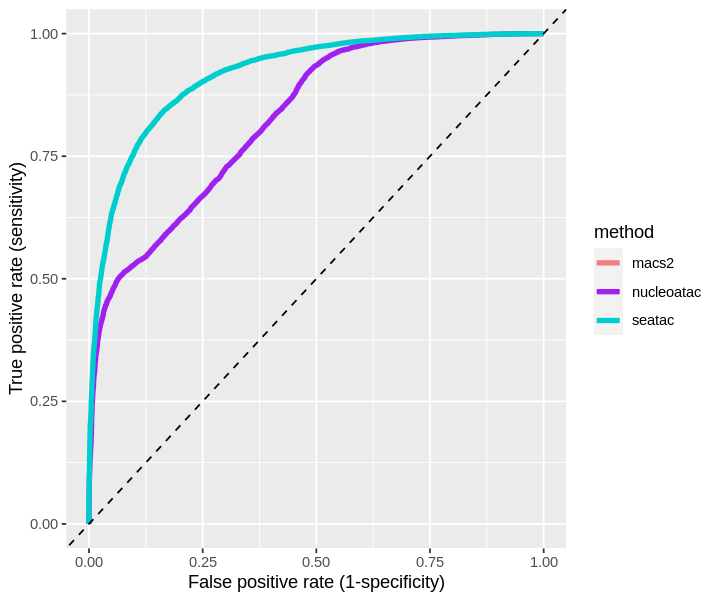

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
roc %>% 
  ggplot(aes( x= fpr, y = tpr, color = method)) +
  geom_line(size = 1.5) +
  xlab("False positive rate (1-specificity)") + 
  ylab("True positive rate (sensitivity)") +
  geom_abline(intercept = 0, slope = 1, linetype = 'dashed') + 
  scale_color_manual(values= c(macs2 = 'lightcoral', nucleoatac = 'purple', seatac = 'cyan3')) +
  scale_fill_manual(values= c(macs2 = 'lightcoral', nucleoatac = 'purple', seatac = 'cyan3'))

## Load the NucleoATAC results on the full data

In [ ]:
cvg <- list()

In [ ]:
remote_nucleoatac_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_20170314b.nucleoatac_signal.smooth.bw'
system(sprintf('wget -x -c %s', remote_nucleoatac_file))
local_nucleoatac_file <- gsub('https://', './', remote_nucleoatac_file)

In [ ]:
cvg[['nfr']][['full_nucleoatac']] <- rtracklayer::import(local_nucleoatac_file, which = gr_S1, format = 'BigWig')
cvg[['nor']][['full_nucleoatac']] <- rtracklayer::import(local_nucleoatac_file, which = gr_S2, format = 'BigWig')

## Read the NucleoATAC results one down-sampled data

In [ ]:
cvg[['nfr']][['ds_nucleoatac']] <- rtracklayer::import(param[1, 'local_nucleoatac_file'], which = gr_S1, format = 'BigWig')
cvg[['nor']][['ds_nucleoatac']] <- rtracklayer::import(param[1, 'local_nucleoatac_file'], which = gr_S2, format = 'BigWig')

## Extract the SeATAC's nucleosome signal on down-sampled data

In [ ]:
cvg[['nfr']][['seatac']] <- slidingWindows(gr_S1, ARGS[['bin_size']], ARGS[['bin_size']]) %>%
  unlist()
cvg[['nfr']][['seatac']]$score <- c(t(rowData(x_test[[1]])$predicted_nucleosome[, 1, ]))
cvg[['nor']][['seatac']] <- slidingWindows(gr_S2, ARGS[['bin_size']], ARGS[['bin_size']]) %>%
  unlist()
cvg[['nor']][['seatac']]$score <- c(t(rowData(x_test[[1]])$predicted_nucleosome[, 2, ]))

## Read the MNase data

In [ ]:
remote_mnase_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Kundajie_version=20190802a/GSM920558_hg19_wgEncodeSydhNsomeGm12878Sig.bw'
system(sprintf('wget -x -c %s', remote_mnase_file))
local_mnase_file <- gsub('https://', './', remote_mnase_file)

In [ ]:
cvg[['nfr']][['mnase']] <- rtracklayer::import(local_mnase_file, which = gr_S1, format = 'BigWig')
cvg[['nor']][['mnase']] <- rtracklayer::import(local_mnase_file, which = gr_S2, format = 'BigWig')

## Prepare `noramlizedMatrix` for `EnrichedHeatmap`

In [ ]:
smooth <- FALSE
extend <- ARGS[['block_size']] / 2 - ARGS[['target_width']] / 2
target_ratio <- 1 / (2 * extend  / ARGS[['target_width']] + 1)
sprintf('target_ratio:%.3f', target_ratio) %>% message()

target_ratio:0.156



In [ ]:
mat_nfr <- lapply(cvg[['nfr']], function(cvgi){
  normalizeToMatrix(
    cvgi,
    resize(gr_S1, fix = 'center', width = ARGS[['target_width']]),
    extend = extend, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = 10, 
    smooth = smooth, 
    target_ratio = target_ratio
  )
})

In [ ]:
mat_nor <- lapply(cvg[['nor']], function(cvgi){
  normalizeToMatrix(
    cvgi,
    resize(gr_S2, fix = 'center', width = ARGS[['target_width']]),
    extend = extend, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = 10, 
    smooth = smooth, 
    target_ratio = target_ratio
  )
})

In [ ]:
mat <- c(mat_nfr, mat_nor)

In [ ]:
mat_groups <- names(mat)
names(mat) <- sprintf('%s_%s', names(mat), rep(c('nfr', 'nor'), each = 4L))

## Find the regions that are determined by SeATAC and NucleoATAC as NOR or NFR, respectively

In [ ]:
res_seatac <- model %>% results(x_test[[1]], type = 'vplots', contrast = c('name', 'S1', 'S2'))

In [ ]:
df <- data.frame(
  seatac_log_ratio = res_seatac$log_ratio,
  nucleoatac_score_diff = rowData(x_test[[1]])$nucleoatac_score[, 2] - rowData(x_test[[1]])$nucleoatac_score[, 1]
) %>%
  mutate(
    group = case_when(
      seatac_log_ratio >= 0 & nucleoatac_score_diff >= 0 ~ '11',
      seatac_log_ratio >= 0 & nucleoatac_score_diff < 0 ~ '10',
      seatac_log_ratio < 0 & nucleoatac_score_diff >= 0 ~ '01',
      seatac_log_ratio < 0 & nucleoatac_score_diff < 0 ~ '00'
    )
  ) %>%
    mutate(group = factor(group, c('11', '10', '01', '00')))

In [ ]:
df %>%
  group_by(group) %>%
  summarize(n())

group,n()
<fct>,<int>
11,3228
10,1255
01,784
00,334


## Heatmap comparison of the nucleosome regions

In [ ]:
names(mat)

[1] "full_nucleoatac_nfr" "ds_nucleoatac_nfr"   "seatac_nfr"         
[4] "mnase_nfr"           "full_nucleoatac_nor" "ds_nucleoatac_nor"  
[7] "seatac_nor"          "mnase_nor"

In [ ]:
group_cols <- c(
  macs2 = 'lightcoral', 
  ds_nucleoatac = 'purple', 
  full_nucleoatac = 'black',
  seatac = 'cyan3',
  mnase = 'red'
)
col_fun <- lapply(1:length(mat), function(i) colorRamp2(quantile(mat[[i]], c(0.005, 0.995)), c('white', group_cols[mat_groups[i]])))
names(col_fun) <- names(mat)

In [ ]:
lgd <- Legend(
  at = c("11", "01", "10", '00'), 
  title = "Clusters", 
  type = "lines", 
  legend_gp = gpar(col = 1:4)
)
ta <- HeatmapAnnotation(
  enriched = anno_enriched(
    gp = gpar(col = 1:4, lty = 1, lwd = 2),
    axis_param = list(facing = 'inside',at = -1000)
  )
)
ht_list <- Heatmap(
  df$group, 
  col = structure(1:4, names = c("11", "01", "10", '00')), 
  name = "partition",
  show_row_names = FALSE, 
  width = unit(3, "mm")
) + EnrichedHeatmap(
  mat[['seatac_nfr']],
  col = col_fun[['seatac_nfr']],
  top_annotation = ta,
  pos_line = TRUE,
  row_order = order(rowData(x_test[[1]])$predicted_nucleosome_center[, 2] - rowData(x_test[[1]])$predicted_nucleosome_center[, 1], decreasing = TRUE),
  name = 'seatac_nfr'
) + EnrichedHeatmap(
  mat[['seatac_nor']],
  col = col_fun[['seatac_nor']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'seatac_nor'
) + EnrichedHeatmap(
  mat[['ds_nucleoatac_nfr']],
  col = col_fun[['ds_nucleoatac_nfr']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'ds_nucleoatac_nfr'
) + EnrichedHeatmap(
  mat[['ds_nucleoatac_nor']],
  col = col_fun[['ds_nucleoatac_nor']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'ds_nucleoatac_nor'
) + EnrichedHeatmap(
  mat[['full_nucleoatac_nfr']],
  col = col_fun[['full_nucleoatac_nfr']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'full_nucleoatac_nfr'
) + EnrichedHeatmap(
  mat[['full_nucleoatac_nor']],
  col = col_fun[['full_nucleoatac_nor']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'full_nucleoatac_nor'
) + EnrichedHeatmap(
  mat[['mnase_nfr']],
  col = col_fun[['mnase_nfr']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'mnase_nfr'
) + EnrichedHeatmap(
  mat[['mnase_nor']],
  col = col_fun[['mnase_nor']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'mnase_nor'
)

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly set

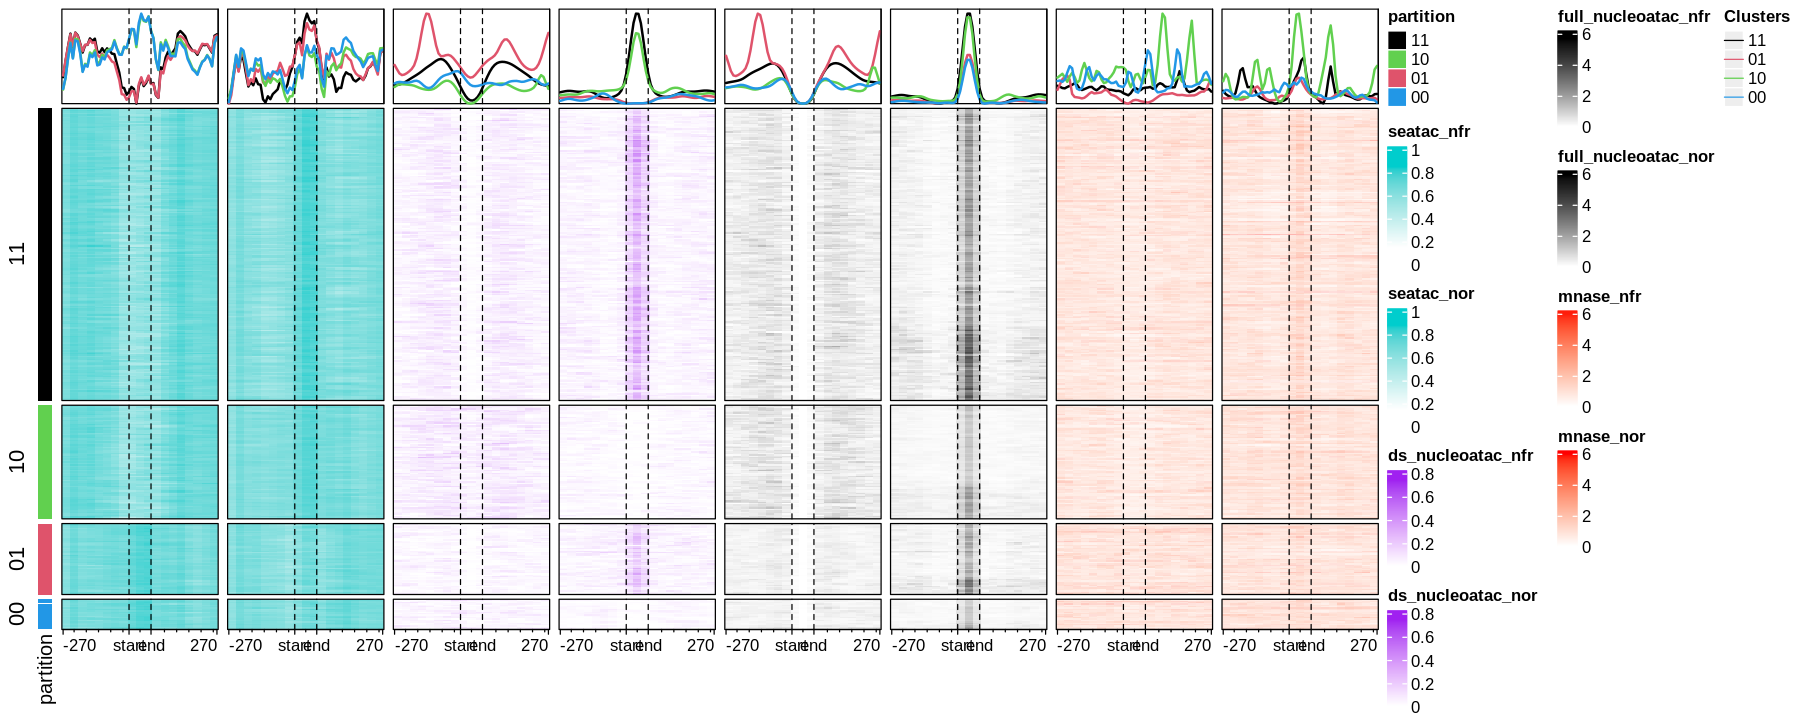

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 6)
draw(ht_list, split = df$group, annotation_legend_list = list(lgd))

## Generate the predicted Vplot

In [ ]:
x_test[[1]] <- model %>% predict(x_test[[1]], batch_size = ARGS[['vae_batch_size']], vplots = TRUE) 

In [ ]:
seqlevels(x_test[[1]]) <- sprintf('chr%s', c(1:22, 'X', 'Y'))
xi_full <- x_test[[1]] %>%
  granges() %>% 
  read_vplot(
    local_bam_file,
    genome = BSgenome.Hsapiens.UCSC.hg19,
    bin_size = ARGS[['bin_size']],
    fragment_size_range = c(0L, ARGS[['fragment_size_range_max']]),
    fragment_size_interval = ARGS[['fragment_size_interval']]
  )

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells.bam



GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand | is_peak_at_center nucleoatac_score
         <Rle>           <IRanges>  <Rle> |         <logical>        <numeric>
  [1]     chr7 158750423-158751062      * |             FALSE      2.92119e-14
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand | is_peak_at_center nucleoatac_score
         <Rle>         <IRanges>  <Rle> |         <logical>        <numeric>
  [1]     chr2 17626588-17627227      * |              TRUE         0.872678
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

Warning message:
“Removed 128 rows containing missing values (geom_raster).”
Warning message:
“Removed 128 rows containing missing values (geom_raster).”


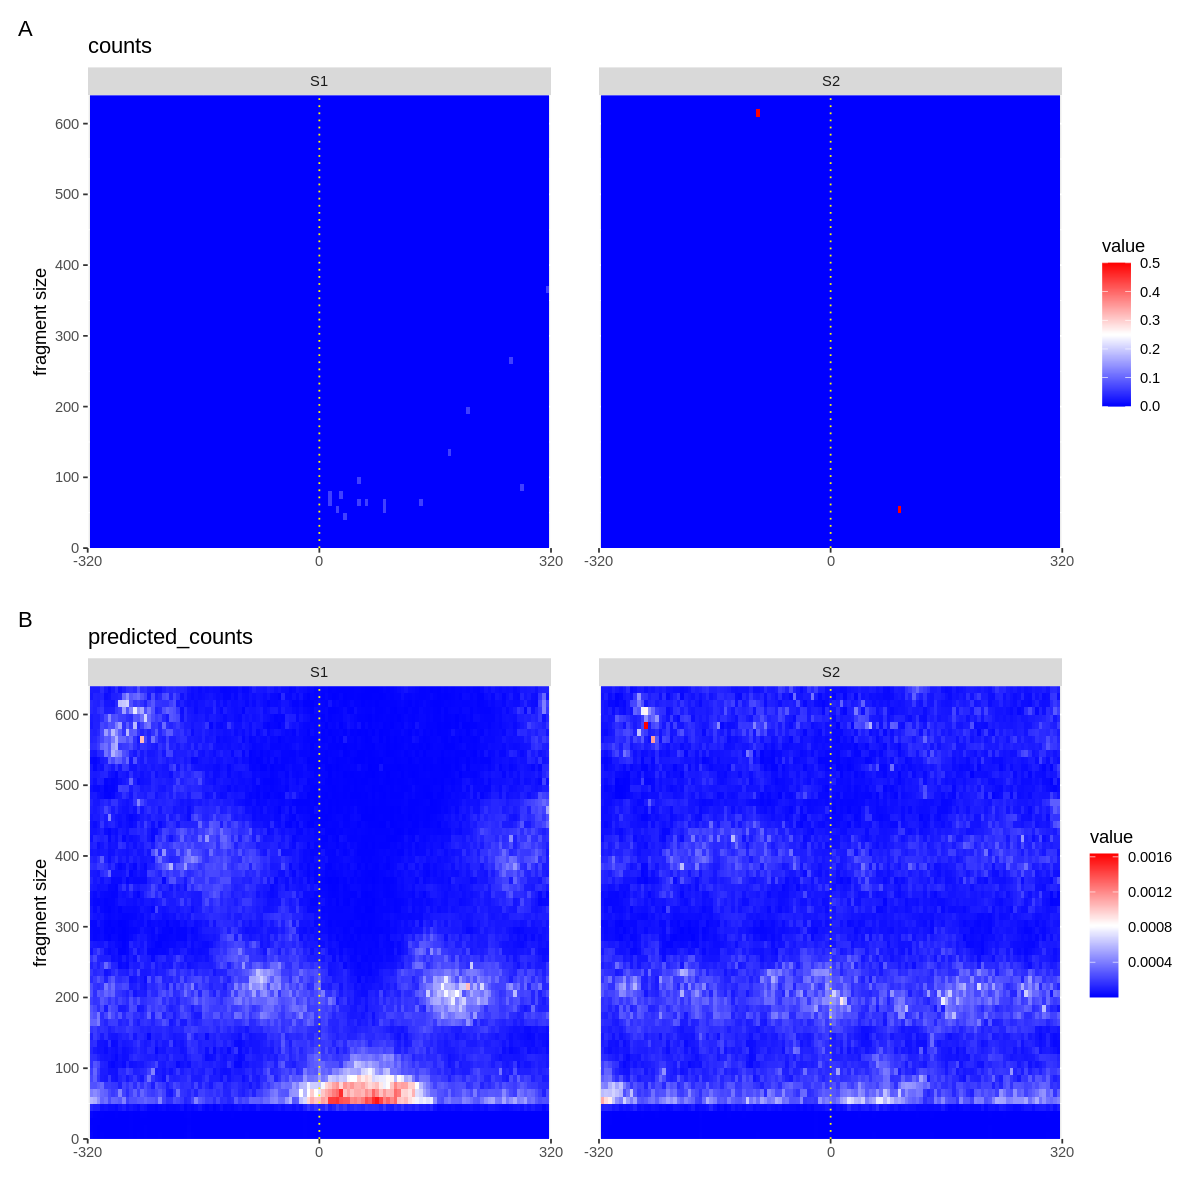

In [ ]:
set.seed(1)
gr_S1[i]
gr_S2[i]
i <- sample(which(res_seatac$pvalue_z < 0.05 & res_seatac$log_ratio > 0.1), 1)
p1 <- vplot(x_test[[1]][i], 'counts', ncol = 2)
p2 <- vplot(x_test[[1]][i], 'predicted_counts', ncol = 2)
options(repr.plot.width = 10, repr.plot.height = 10)
p1 / p2 + plot_annotation(tag_levels = 'A')

## SessionInfo

In [ ]:
sessionInfo()

In [ ]:
Sys.time() - start_time

Time difference of 47.90785 mins